# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [ ]:
import numpy as np
import scipy.linalg as sla

data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [ ]:
X_train = data_train[:,0]
Y_train = data_train[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [ ]:
A = np.vstack([X_train, np.ones(len(X_train))]).T
x, y = sla.inv(A.T @ A) @ A.T @ Y_train
print(f'{x:.4f}x + {y:.4f}')

2.2791x + 4.4332


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

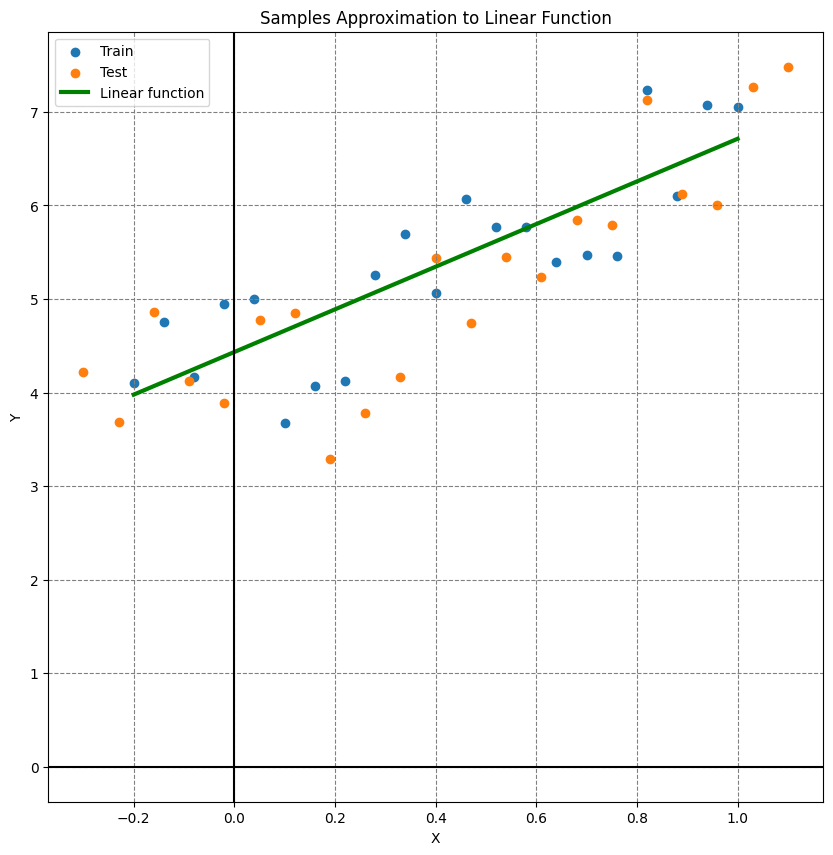

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(X_train, Y_train, label='Train')
plt.scatter(X_test, Y_test, label='Test')
plt.plot(X_train, x * X_train + y, color='green', label='Linear function', linewidth=3)
plt.gca().grid(which="both", color="gray", linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().axhline(y=0, color='black')
plt.gca().axvline(x=0, color='black')
plt.legend()
plt.title("Samples Approximation to Linear Function")
plt.show()


**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.


> Стоит предположить, что раз нам даны 21 переменная, то и стоит рассмотреть многочлен $n-1 = 20 $ степени (aka интерполляционный полином Лагранжа)



In [ ]:
X_new=np.vander(X_train,N=21,increasing=True)
poly_coef=sla.inv(X_new.T @ X_new) @ X_new.T @ Y_train
for i in range(len(poly_coef)):
    print("x^" + str(i) + " * " + str(poly_coef[i])) 

x^0 * 5.099281704229356
x^1 * 3.8803748590162237
x^2 * -218.1243558421475
x^3 * -518.4151605145053
x^4 * 14705.130352413275
x^5 * -8357.461597042991
x^6 * -343804.3364155599
x^7 * 959873.9502871865
x^8 * 1639051.3345457127
x^9 * -11786900.928340586
x^10 * 20128446.96295228
x^11 * -9123310.5829439
x^12 * -8629737.102854265
x^13 * 2907979.816594127
x^14 * 13449366.4987035
x^15 * -11839785.909100426
x^16 * 2507730.599888718
x^17 * 3449968.3499307027
x^18 * -9852023.646927144
x^19 * 9560702.205516847
x^20 * -3033177.6293634395


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

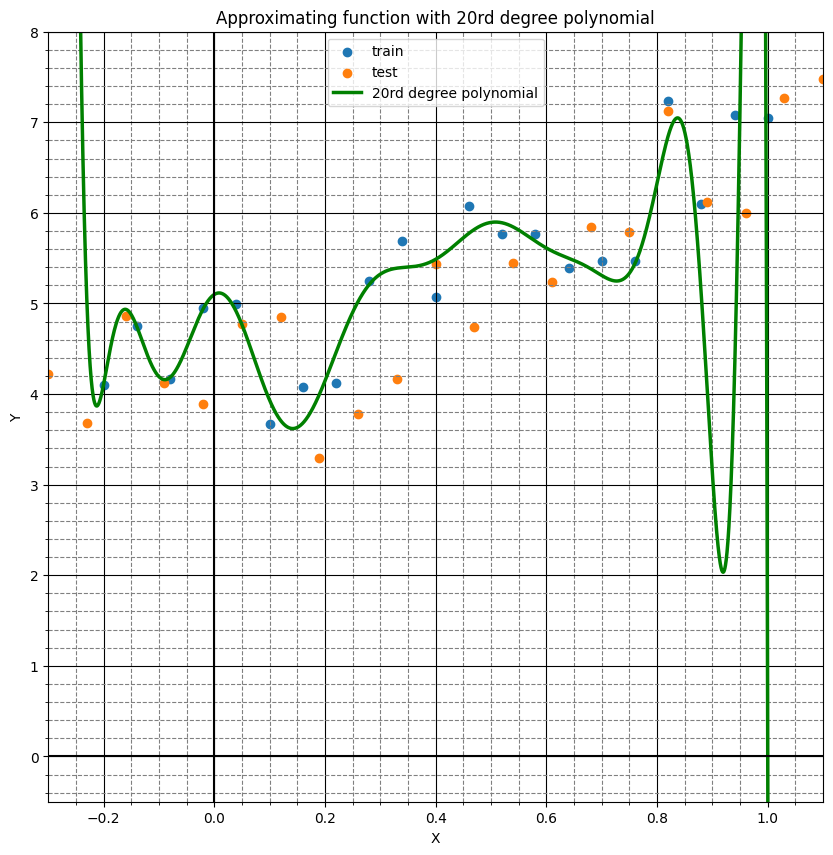

In [ ]:
x_dots = np.linspace(-1, 1.1, 10000)
van = np.vander(x_dots, N=21, increasing=True)
y_dots = np.sum(poly_coef * van, axis=1)

plt.figure(figsize=(10, 10))
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, label='test')
plt.plot(x_dots, y_dots, color='green', label='20rd degree polynomial', linewidth=2.5)
plt.legend(loc='upper center')

ax = plt.gca()
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
ax.grid(which='major', color='black')
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--')
plt.xlim(-0.3, 1.1)
plt.ylim(-0.5, 8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Approximating function with 20rd degree polynomial')
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
X = np.zeros((len(X_train), 11))
X[:, 0] = np.ones(len(X_train))
poly_coefs = np.zeros((10, 11))

for degree in range(1, 11):
    X[:, degree] = X_train ** degree
    poly_coefs[degree - 1, :] = sla.pinv(X.T @ X) @ X.T @ Y_train
print(poly_coefs)
print("\n Вид как в условии: ")
for i in range(len(poly_coefs)):
    output_str = ""
    for j in range(len(poly_coefs[i])):
        if j == 0:
            output_str += str(poly_coefs[i][j])
        else:
            output_str += " + " + str(poly_coefs[i][j]) + "x^" + str(j)
    print(output_str, '\n')

[[ 4.43323091e+00  2.27913450e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47247650e+00  1.15783169e+00  1.40162851e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.46073636e+00  1.06501611e+00  1.85975084e+00 -3.81768604e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.34116612e+00  1.17180239e+00  6.79409178e+00 -1.30513281e+01
   7.91847470e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.43129781e+00 -1.30598040e-01  3.27471440e+00  2.13747963e+01
  -5.11314814e+01  2.95249780e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.38379501e+00 -4.59717933e+00  1.60029040e+01  1.21257097e+02
  -4.81510133e+02  

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [ ]:
van_full = np.vander(np.concatenate((X_train, X_test)), N=21, increasing=True)
van_train_f = van_full[:len(X_train), :]
van_test_f = van_full[len(X_train):, :]
MSE_errors = np.zeros([10, 2])

for i in range(1, 11):
    van_train_i = van_train_f[:, :i+1]
    van_test_i = van_test_f[:, :i+1]
    poly_coefs_i = sla.inv(van_train_i.T @ van_train_i) @ van_train_i.T @ Y_train
    err1 = np.mean((van_train_i @ poly_coefs_i - Y_train) ** 2)
    err2 = np.mean((van_test_i @ poly_coefs_i - Y_test) ** 2)
    MSE_errors[i-1, 0] = err1
    MSE_errors[i-1, 1] = err2
print(f"MSE for          train       test")
for i in range(len(MSE_errors)):
    print(f"poly_deg = {i+1}: {MSE_errors[i]}")

MSE for          train       test
poly_deg = 1: [0.29689663 0.4351202 ]
poly_deg = 2: [0.26969892 0.35647629]
poly_deg = 3: [0.26949719 0.35534646]
poly_deg = 4: [0.26106653 0.44172702]
poly_deg = 5: [0.24998505 0.5579732 ]
poly_deg = 6: [0.18829349 2.58169293]
poly_deg = 7: [0.18539621 2.51578291]
poly_deg = 8: [0.15905557 4.35728904]
poly_deg = 9: [0.15847184 4.77634497]
poly_deg = 10: [ 0.15316611 14.6323587 ]


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

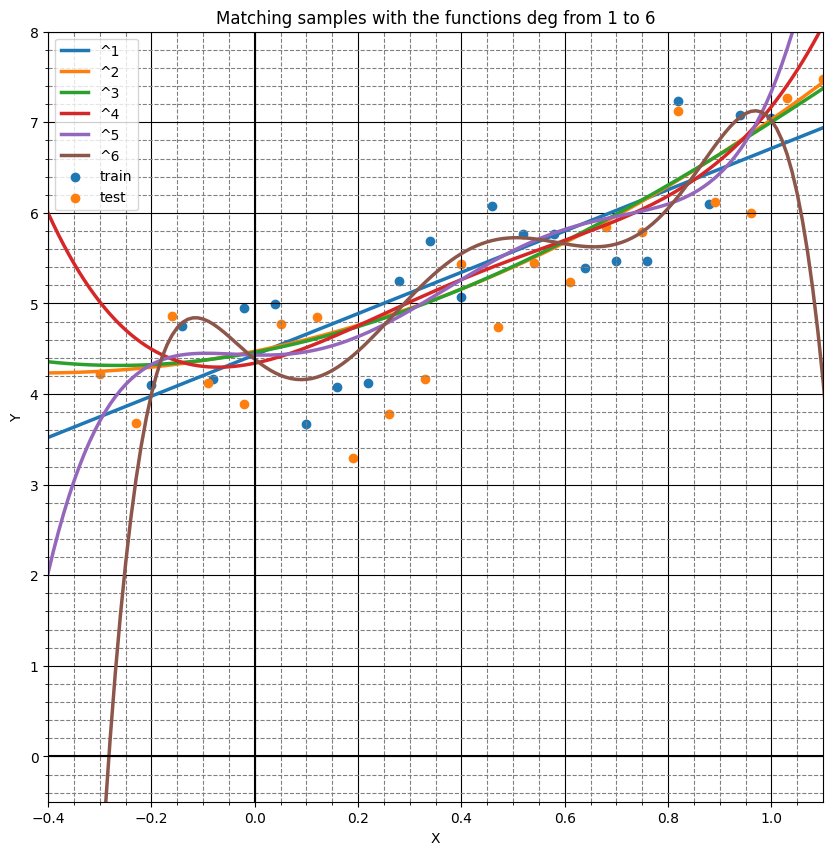

In [ ]:
axis_x = np.arange(-1, 1.5, 0.01)
n_degrees = [1, 2, 3, 4, 5, 6]
axis_y = np.zeros((len(n_degrees), len(axis_x)))

for i, deg in enumerate(n_degrees):
    coefs = poly_coefs[deg - 1, :]
    poly = np.poly1d(coefs[::-1])
    axis_y[i, :] = poly(axis_x)

plt.figure(figsize=(10, 10))
for i, deg in enumerate(n_degrees):
    plt.plot(axis_x, axis_y[i, :], label=f"^{deg}", linewidth=2.5)

plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, label='test')
plt.legend(loc = "upper left")
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(which='major', color='k')
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.4, 1.1)
plt.ylim(-0.5, 8)
plt.title('Matching samples with the functions deg from 1 to 6')
plt.show()


**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?



> При росте степени многочлена ошибка на обучающих данных будет уменьшаться, так как модель становится всё более сложной и пытается точнее приближать обучающие данные. С другой стороны, модель может начать переобучаться на обучающих данных и будет хуже работать на новых данных, что приводит к росту среднеквадратиной ошибки на тестовых данных, что подтверждают результаты 6 номера.

> Существует понятие переобучения, когда модель отлично отрабатывает на обучающей выборке и плохо на тествой.

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [ ]:
data = np.loadtxt("flats_moscow_mod.txt", skiprows=1, delimiter="\t", dtype=float)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=1)

Y_train = train[:, 0]
X_train = train[:, 1:]

Y_test = test[:, 0]
X_test = test[:, 1:]

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
result = sla.inv(X_train.T @ X_train) @ X_train.T @ Y_train
print(f"price ~ {result[0]:.4f} * totsp + {result[1]:.4f} * livesp + {result[2]:.4f} * kitsp + {result[3]:.4f} * dist + {result[4]:.4f} * metrdist")

price ~ 1.7209 * totsp + 1.1680 * livesp + 0.7643 * kitsp + -4.0745 * dist + -1.7060 * metrdist


**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?



> Расстояние до центра и до метро оказывают наибольшее воздействие на формирование цены, я не представляю как мне потом придётся отвыкать от того, что у меня сейчас метро в 30 секундной доступности.
Они трицательны, т.к. чем дальше - тем хуже.


> Далее идут площадь квартиры и жилая площадь, они оказывают значительный вклад в формирование цены, далее идёт площадь кухни

> В целом модель достатоно логично описала данные




**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
MSE = np.mean((X_test @ result - Y_test)**2)
print(f"Mean Square Error: {MSE:.4f}")

Mean Square Error: 776.4247


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.



> Попробуем добавить в нашу модель ещё один признак - это произведение площади и дистанции до центра, т.к. мне кажется они завистят друг от друга, при этом не линейно а-ля цена будет одинаковой для большой квартиры, но далеко и для маленькой но близко к центру


**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
X_train = np.column_stack([X_train, X_train[:, 0]**0.7 * X_train[:, 3]])
X_test = np.column_stack([X_test, X_test[:, 0]**0.7 * X_test[:, 3]])

A = np.column_stack([X_train, np.ones(len(X_train))])
result = sla.inv(A.T @ A) @ A.T @ Y_train
print(f"price ~ {result[0]:.4f} * totsp + {result[1]:.4f} * livesp + {result[2]:.4f} * kitsp + {result[3]:.4f} * dist + {result[4]:.4f} * metrdist + {result[5]:.4f} * totsp * dist")

price ~ 3.2510 * totsp + 1.6156 * livesp + 1.3131 * kitsp + 12.6962 * dist + -1.2832 * metrdist + -0.8040 * totsp * dist


**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
Y_pred = np.column_stack([X_test, np.ones(len(X_test))]) @ result
MSE = np.mean((Y_pred - Y_test)**2)
print(f"Mean Square Error: {MSE:.4f}")

Mean Square Error: 745.3700



> Добавление такого доп параметра уже уменьшило откдлонение на 31 у.е.







> Если ещё поиграться с параметрами и положить, что жилая площадь имеет логарифмическую зависимость, то получим:


In [ ]:
X_train[:, 1] = np.log(X_train[:, 1])
X_test[:, 1] = np.log(X_test[:, 1])

A = np.column_stack([X_train, np.ones(len(X_train))])
result = sla.inv(A.T @ A) @ A.T @ Y_train
Y_pred = np.column_stack([X_test, np.ones(len(X_test))]) @ result
MSE = np.mean((Y_pred - Y_test)**2)
print(f"Mean Square Error: {MSE:.4f}")

Mean Square Error: 718.9090




> Получили уточнение модели на 58 у.е. от начального, т.е. примерно на 7.5%



### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?



> Полагаю, что подбор коэффициента регуляризации по обучающей выборке может привести к переобучению модели, когда модель будет слишком точно подстроена под обучающую выборку и будет показывать плохие результаты на новых данных. Также, подбор коэффициента регуляризации по тестовой выборке может привести к переобучению на тестовой выборке и дать завышенную оценку точности модели.



**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [ ]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

X_train_ful = data_train[:, 0]
Y_train_ful = data_train[:, 1]

train, validate = train_test_split(data_train, train_size=0.5, random_state=1)

X_train = train[:, 0]
Y_train = train[:, 1]

X_validate = validate[:, 0]
Y_validate = validate[:, 1]

X_test = data_test[:, 0]
Y_test = data_test[:, 1]

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [ ]:
X_train_poly = np.vander(X_train, 7, increasing=True)
X_validate_poly = np.vander(X_validate, 7, increasing=True)
X_test_poly = np.vander(X_test, 7, increasing=True)

alphas = np.logspace(-1, 1, num=500)
min_mse = 1e9
for alpha in alphas:
    W = sla.inv(X_train_poly.T @ X_train_poly + alpha * np.eye(7)) @ X_train_poly.T @ Y_train

    Y_validate_pred = X_validate_poly @ W
    mse_valid = np.mean((Y_validate - Y_validate_pred) ** 2)
    if mse_valid <= min_mse:
        min_mse = mse_valid
    else:
        break

Y_test_pred = X_test_poly @ W
mse_test = np.mean((Y_test - Y_test_pred) ** 2)

print(f"alpha = {alpha:.9f}, MSE_valid = {mse_valid:.4f}, MSE_test = {mse_test:.4f} ")

alpha = 0.850863158, MSE_valid = 0.2814, MSE_test = 0.3172 




> Получили точность лучше, чем многочлен оптимальный степени (3), у которого mse = 0.35534646



**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

In [ ]:
print(f"без регуляции = {sla.det(X_train_poly.T @ X_train_poly):.15f}")
print(f" с регуляцией = {sla.det(X_train_poly.T @ X_train_poly + alpha * np.eye(7))}")

без регуляции = 0.000000000000030
 с регуляцией = 62.26947774242088



>$\forall$ $A$ определитель $A^T A$ всегда неотрицательный, т.к. он является суммой квадратов элементов матрицы $A$. Он $=0 \iff ∃$ ЛЗ строки//столбцы и равен квадрату det(A), если квадратная $⇒$ он всегда $≥$ 0

>Теперь рассмотрим матрицу $X^TX+\lambda E$. Поскольку $\lambda > 0$, то $\lambda E$ является положительно определенной матрицей. Для любой матрицы $X$ размера $n \times m$ мы имеем $(X^TX)_{m \times m}$, поэтому матрица $X^TX$ также является положительно определённой матрицей $\Rightarrow$ матрица $X^TX+\lambda E$ тоже является положительно определенной(как сумма 2 положительно определённых матриц).




**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

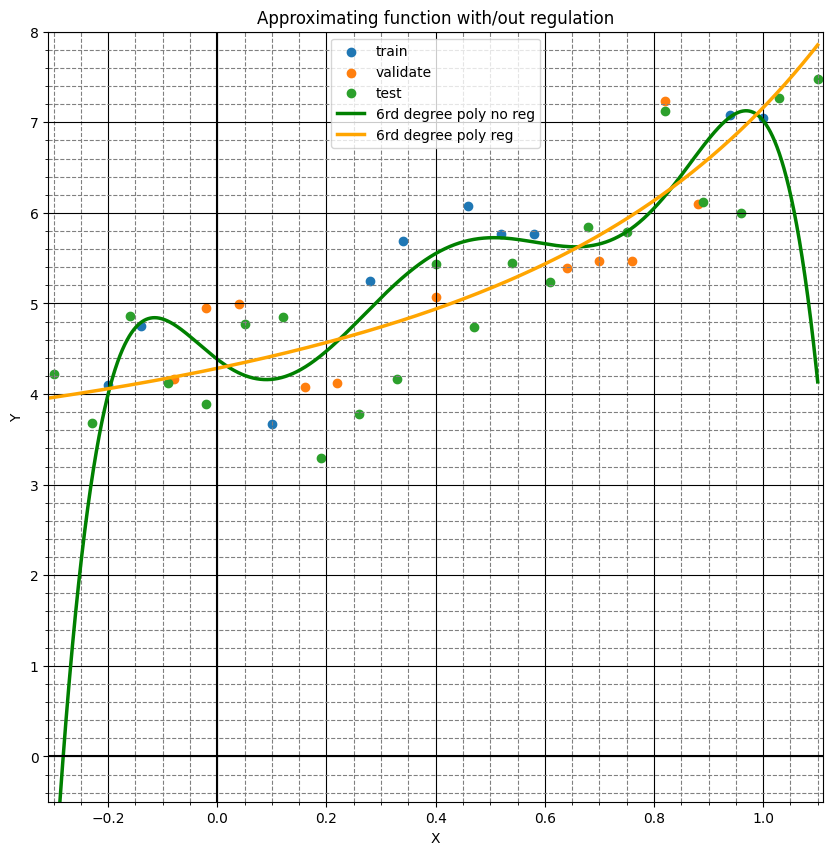

In [ ]:
X_new=np.vander(X_train_ful,N=7,increasing=True)
poly_coef_noreg=sla.inv(X_new.T @ X_new) @ X_new.T @ Y_train_ful
poly_coef_reg=sla.inv(X_new.T @ X_new + alpha * np.eye(7)) @ X_new.T @ Y_train_ful

x_dots_noreg = np.linspace(-1, 1.1, 10000)
van_noreg = np.vander(x_dots_noreg, N=7, increasing=True)
y_dots_noreg = np.sum(poly_coef_noreg * van_noreg, axis=1)

x_dots_reg = np.linspace(-1, 1.1, 10000)
van_reg = np.vander(x_dots_reg, N=7, increasing=True)
y_dots_reg = np.sum(poly_coef_reg * van_reg, axis=1)

plt.figure(figsize=(10, 10))
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_validate, Y_validate, label='validate')
plt.scatter(X_test, Y_test, label='test')
plt.plot(x_dots_noreg, y_dots_noreg, color='green', label='6rd degree poly no reg', linewidth=2.5)
plt.plot(x_dots_reg, y_dots_reg, color='orange', label='6rd degree poly reg', linewidth=2.5)
plt.legend(loc='upper center')

ax = plt.gca()
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
ax.grid(which='major', color='black')
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--')
plt.xlim(-0.31, 1.11)
plt.ylim(-0.5, 8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Approximating function with/out regulation')
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

>На графике явно заметно, как регуляцияя меняет функцию(делает её более гладкой, менее подверженной колебаниям)

>Это положительно сказывается на модели, т.к. регуляяцияя позволяет уменьшить переобучение модели и повысить ее обобщающую способность, модель меньше уделяет внимания на данные, походящие на  "шум"

>Регуляция, как правило, позволяет более устойчиво обобщать результаты на новых данных

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

> Для решения данной задачи оптимизации найдем производную целевой функции по вектору $a$ и приравняем ее к нулю:
$\frac{\partial}{\partial a}$$(|Xa - y|^2 + \lambda |a|^2) =  \frac{\partial}{\partial a}((Xa - y)^T(Xa - y) + \lambda a^T a) = (a^TX^TXa - a^TX^Ty - y^TXa + y^Ty + \lambda a^Ta = 
2X^T(Xa - y) + 2 \lambda a = 0$

> $ X^TXa + \lambda E_ka = X^Ty$, где $E_k$ — единичная матрица размера $k \times k$

> Если $\lambda > 0$, то матрица $X^TX + \lambda E_k$ является положительно определенной, так как $\forall a \neq 0$ выполнено:
$a^TX^TXa+\lambda a^Ta > 0$

> Т.e. матрица обратима и det матрицы $X^TX + \lambda E_k >0$

> Решение задачи наименьших квадратов с $L_2$ регуляризацией имеет вид:
$a = (X^TX + \lambda E)^{-1}X^Ty$

> $∃$ решения зависит от $rk(X)$:
>>  Если $rk(X) < k$, см далее... Если $rk(X) = k$, то $∃!$ решение решение.


Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

>Если мы регуляризуем коэффициент при константном признаке (который состоит из одних единиц), то мы фактически штрафуем модель за ее сдвиг (bias). Таким образом, мы можем существенно ухудшить предсказательную способность модели, поскольку она будет иметь меньше возможностей для смещения и будет более ограничена в плане аппроксимации данных, это видно по прошлому графику, как жмыхнуло оранжевую кривую с регуляризацией, тут главное не перестараться



**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

>Если $rk(X)<k$, то решение задачи может $∄$ или быть $∞$ много, $⇓$

>Если $rk(X)<n , k < n$, то уравнение $Xa=y$ имеет $∞$ количество решений, т.к. $∃$ вектор $b \neq 0$  в $ker(X)$, т.e. $Xb=0$ Тогда $∀$ $a, где a=b+c$, где $c$ $─$ $∀$ фиксированный вектор, будет являться решением уравнения $Xa=y$.

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?



¯\\_(ツ)_/¯

>Если модель слишком сильно подстраивается под обучающую выборку, то ее веса могут принимать очень большие значения(в идеально подогнанном полиноме Лагранжа из задачи ранее, коэффиценты достигали 13млрд), чтобы как можно лучше описать эти данные. В такой модели коэффициенты при признаках не отражают их действительный вклад в формирование модели, а значит, она будет работать плохо на новых данных.



### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.


> Для матрицы $X_{(t+1)}$ вычисляем $X_{(t+1)}^T X_{(t+1)}$ и $X_{(t+1)}^T y_{(t+1)}$ следующим образом:

>Используем результат вычисления $X_{(t)}^T X_{(t)}$ и $X_{(t)}^T y_{(t)}$, который был известен ранее

> Обновляем результаты, используя соотношение:

> > $X_{(t+1)}^T X_{(t+1)} = X_{(t)}^T X_{(t)} + x_{(t+1)}^T x_{(t+1)}$

> > $X_{(t+1)}^T y_{(t+1)} = X_{(t)}^T y_{(t)} + x_{(t+1)}^T y_{(t+1)}$

> Алгоритм использует рекурсивную формулу для вычисления матрицы $X_{(t+1)}^T {(t+1)}$ и $X_{(t+1)}^T y_{(t+1)}$, основываясь на результатах прошлого шага

> Сложность алгоритма не зависит от $t$, так как добавление нового параметра $x_{t+1}$ в матрицу $X_{(t)}$ и вектор $y_{(t)}$ требует только константного времени, а вычисление $X_{(t+1)}^T X_{(t+1)}$ и $X_{(t+1)}^T y_{(t+1)}$ требует $O(n^2)$, $n$ - число параметров в модели



**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.



> Я немного изменил исходный код, чтобы сохранить 5 отдельных графиков для каждой из степеней, а не динамический плоттинг


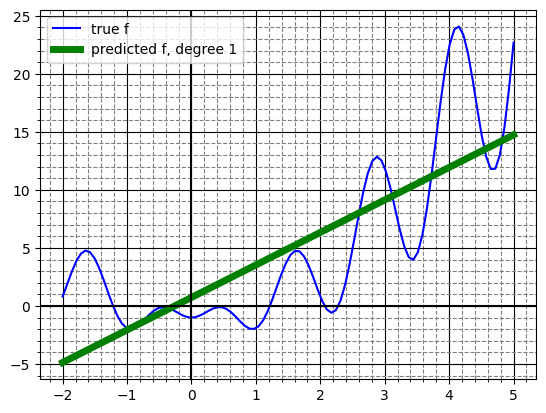

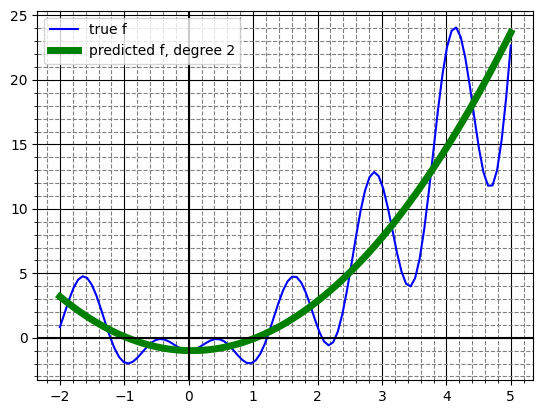

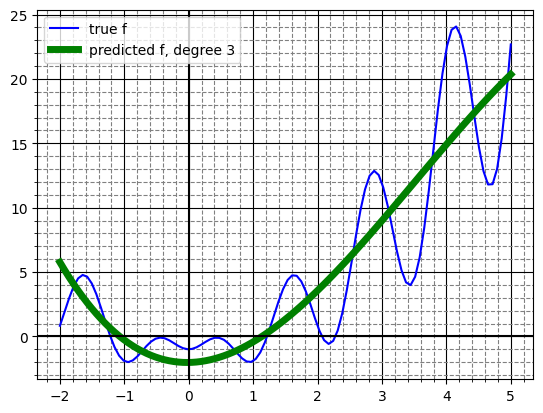

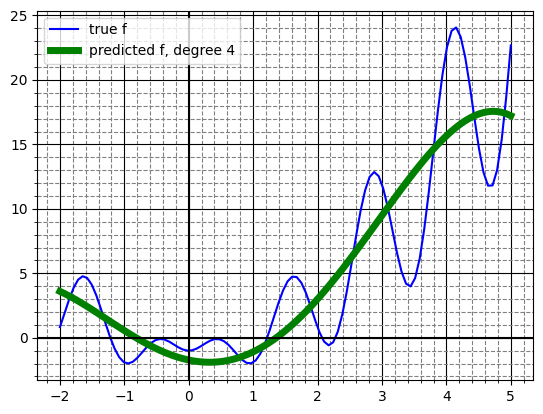

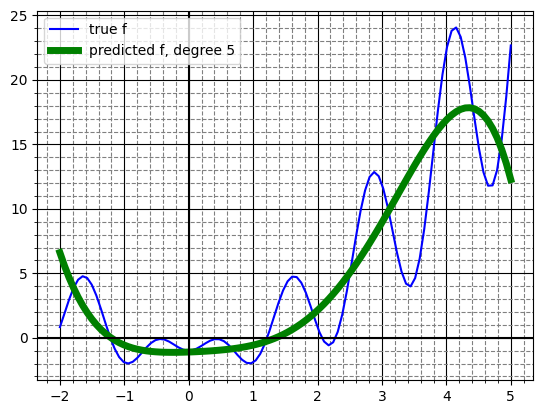

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 

x_grid = np.linspace(-2,5,100)
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

X = np.empty((0,6))
Y = np.empty((0,1))


for i in range(200):
    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()

    x_new_enl = np.array([[x_new**j for j in range(6)]])
    X = np.vstack((X, x_new_enl))
    Y = np.vstack((Y, y_new))

for deg in range(1, 6):
    f = plt.figure(deg)
    coefs = np.linalg.inv(X[:, :deg+1].T @ X[:, :deg+1] + 0.1*np.eye(deg+1)) @ X[:, :deg+1].T @ Y
    y_pred = x_grid.reshape((-1, 1))**np.arange(deg+1) @ coefs
    clear_output(True)
    plt.plot(x_grid, y_grid, color='blue', label='true f')
    # plt.scatter(x_new, y_new, color='red') # не считаю значмым отображать точки входных данных
    plt.plot(x_grid, y_pred, color='green', linewidth=5, label=f'predicted f, degree {deg}')
    plt.legend(loc='upper left')
    ax = plt.gca()
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')
    ax.grid(which='major', color='black')
    ax.minorticks_on()
    ax.grid(which='minor', color='gray', linestyle='--')
    f.show()